In [179]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [180]:
onecall = True  # 8 days
#onecall = False # 5 days

In [181]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [182]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [183]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17, 18])

In [184]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'rain', 'uvi'],
       dtype='object'),
 19)

In [185]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [186]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,rain,uvi
0,09/08/2024,06:35:20,21:16:54,11:44:00,23:02:00,0.15,"{'day': 27.42, 'min': 20.47, 'max': 28.14, 'ni...","{'day': 27.62, 'night': 23.64, 'eve': 25.4, 'm...",1018,47,15.06,4.86,300,8.93,"[{'id': 500, 'main': 'Rain', 'description': 'l...",74,0.2,0.18,5.52
1,10/08/2024,06:36:45,21:15:13,12:51:00,23:15:00,0.18,"{'day': 27.34, 'min': 18.47, 'max': 31.13, 'ni...","{'day': 27.06, 'night': 25.12, 'eve': 29.15, '...",1022,39,12.16,3.40,27,5.32,"[{'id': 801, 'main': 'Clouds', 'description': ...",19,0.0,NaN,7.09
2,11/08/2024,06:38:09,21:13:31,14:01:00,23:32:00,0.21,"{'day': 29.24, 'min': 20.3, 'max': 31.83, 'nig...","{'day': 28.58, 'night': 26.39, 'eve': 30.06, '...",1018,37,12.98,4.39,94,8.69,"[{'id': 803, 'main': 'Clouds', 'description': ...",60,0.0,NaN,6.95
3,12/08/2024,06:39:34,21:11:48,15:13:00,23:52:00,0.25,"{'day': 34.38, 'min': 22.55, 'max': 36.68, 'ni...","{'day': 33.45, 'night': 27.98, 'eve': 35, 'mor...",1009,28,13.07,4.45,228,9.96,"[{'id': 801, 'main': 'Clouds', 'description': ...",23,0.0,NaN,6.69
4,13/08/2024,06:40:59,21:10:03,16:26:00,01:00:00,0.28,"{'day': 24.8, 'min': 20.75, 'max': 24.9, 'nigh...","{'day': 24.98, 'night': 22.8, 'eve': 24.36, 'm...",1012,63,17.06,3.80,332,6.02,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,1.0,5.21,6.45
5,14/08/2024,06:42:24,21:08:17,17:39:00,00:19:00,0.31,"{'day': 18.47, 'min': 15.51, 'max': 21.43, 'ni...","{'day': 18.17, 'night': 18.98, 'eve': 21.14, '...",1017,69,12.45,3.14,32,5.19,"[{'id': 501, 'main': 'Rain', 'description': 'm...",100,1.0,8.80,7.00
6,15/08/2024,06:43:49,21:06:30,18:45:00,00:58:00,0.34,"{'day': 23.93, 'min': 17.89, 'max': 27.05, 'ni...","{'day': 23.68, 'night': 22.58, 'eve': 26.13, '...",1019,50,12.84,3.75,309,6.05,"[{'id': 802, 'main': 'Clouds', 'description': ...",39,0.0,NaN,7.00
7,16/08/2024,06:45:14,21:04:41,19:39:00,01:51:00,0.38,"{'day': 22.97, 'min': 17.8, 'max': 23.29, 'nig...","{'day': 22.26, 'night': 16.92, 'eve': 19.98, '...",1020,36,6.90,4.47,324,8.44,"[{'id': 500, 'main': 'Rain', 'description': 'l...",93,1.0,1.26,7.00


In [187]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            10/08/2024
sunrise         06:36:45
sunset          21:15:13
moonrise        12:51:00
moonset         23:15:00
moon_phase          0.18
pressure            1022
humidity              39
dew_point          12.16
wind_speed           3.4
wind_deg              27
wind_gust           5.32
pop                  0.0
rain                 NaN
uvi                 7.09
Name: 1, dtype: object

In [188]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV


dt                                                   09/08/2024
sunrise                                                06:35:20
sunset                                                 21:16:54
moonrise                                               11:44:00
moonset                                                23:02:00
moon_phase                                                 0.15
temp          {'day': 27.42, 'min': 20.47, 'max': 28.14, 'ni...
feels_like    {'day': 27.62, 'night': 23.64, 'eve': 25.4, 'm...
pressure                                                   1018
humidity                                                     47
dew_point                                                 15.06
wind_speed                                                 4.86
wind_deg                                                    300
wind_gust                                                  8.93
weather       [{'id': 500, 'main': 'Rain', 'description': 'l...
clouds                                  

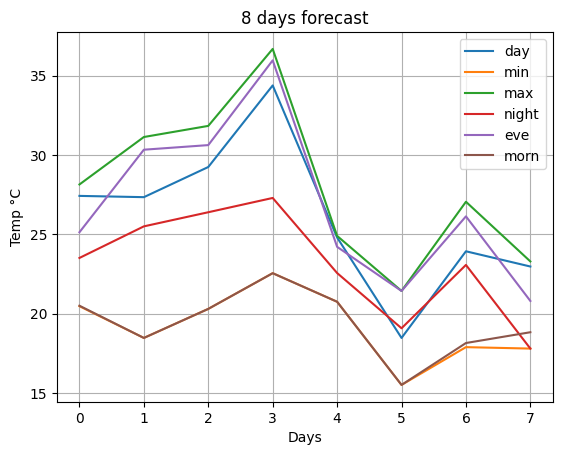

In [189]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [190]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()
    


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1723226400, 'main': {'temp': 25.24, 'feels_like': 25.57, 'temp_min': 24.66, 'temp_max': 25.24, 'pressure': 1019, 'sea_level': 1019, 'grnd_level': 1009, 'humidity': 67, 'temp_kf': 0.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': {'all': 100}, 'wind': {'speed': 3.55, 'deg': 269, 'gust': 5.67}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-09 18:00:00'}, {'dt': 1723237200, 'main': {'temp': 24.31, 'feels_like': 24.52, 'temp_min': 22.44, 'temp_max': 24.31, 'pressure': 1019, 'sea_level': 1019, 'grnd_level': 1011, 'humidity': 66, 'temp_kf': 1.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'clouds': {'all': 72}, 'wind': {'speed': 2.02, 'deg': 318, 'gust': 4.66}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-08-09 21:00:00'}, {'dt': 1723248000, 'main': {'temp': 21.

In [191]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1723226400
main          {'temp': 25.24, 'feels_like': 25.57, 'temp_min...
weather       [{'id': 804, 'main': 'Clouds', 'description': ...
clouds                                             {'all': 100}
wind                  {'speed': 3.55, 'deg': 269, 'gust': 5.67}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'd'}
dt_txt                                      2024-08-09 18:00:00
rain                                                        NaN
Name: 0, dtype: object


In [192]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain'],
      dtype='object')

In [193]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['date','time','temp_max','temp_min']])


          date      time  temp_max  temp_min
0   09/08/2024  20:00:00     25.24     24.66
1   09/08/2024  23:00:00     24.31     22.44
2   10/08/2024  02:00:00     21.95     20.31
3   10/08/2024  05:00:00     18.97     18.97
4   10/08/2024  08:00:00     18.98     18.98
5   10/08/2024  11:00:00     23.88     23.88
6   10/08/2024  14:00:00     28.73     28.73
7   10/08/2024  17:00:00     31.13     31.13
8   10/08/2024  20:00:00     29.19     29.19
9   10/08/2024  23:00:00     25.50     25.50
10  11/08/2024  02:00:00     22.88     22.88
11  11/08/2024  05:00:00     21.04     21.04
12  11/08/2024  08:00:00     20.83     20.83
13  11/08/2024  11:00:00     25.99     25.99
14  11/08/2024  14:00:00     30.45     30.45
15  11/08/2024  17:00:00     31.83     31.83
16  11/08/2024  20:00:00     29.70     29.70
17  11/08/2024  23:00:00     26.39     26.39
18  12/08/2024  02:00:00     24.69     24.69
19  12/08/2024  05:00:00     23.26     23.26
20  12/08/2024  08:00:00     23.46     23.46
21  12/08/

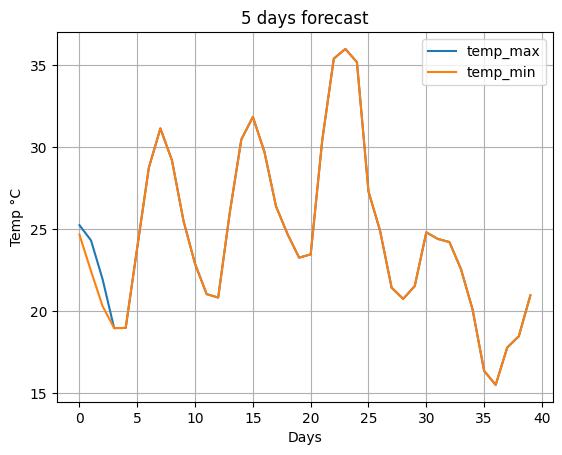

In [194]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()
    